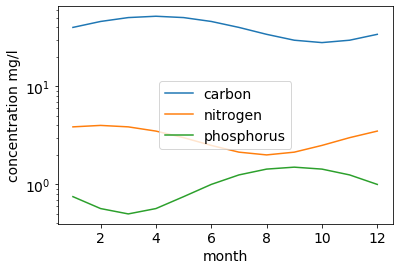

In [8]:
# imports
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ternary
import matplotlib

sys.path.append('../tools/')
from macronutrient_normalization import ternary_normalization
from macronutrient_ternary_subplot import ternary_subplot
from macronutrient_ternary_subplot import add_cbar
from dist_metric import dist_metric


# define matplotlib settings
FS = 14
matplotlib.rc('xtick', labelsize=FS)
matplotlib.rc('ytick', labelsize=FS)
matplotlib.rcParams.update({'font.size': FS})

# define functions


def mockup_data(a: float, b:float , c:float):
    """
    example concentration time series based on sine waves
    :param a: mean value
    :param b: amplitude
    :param c: phase
    """
    
    # define sine wave angular velocity
    tau = 12
    omega = 2 * np.pi / tau
    
    # define x coordinates for sine
    x = np.arange(1, tau + 1)
    
    return a + b * np.cos(omega*(x-c))



# create mockup concentration data 
carbon = mockup_data(40, 12, 4)
nitrogen = mockup_data(3, 1, 2)
phosphorus = mockup_data(1, .5, 9)

# show time series
months = np.arange(1, 13)
f, ax = plt.subplots()
ax.plot(months, carbon, label='carbon')
ax.plot(months, nitrogen, label='nitrogen')
ax.plot(months, phosphorus, label='phosphorus')
ax.set_yscale('log')
ax.legend()
ax.set_ylabel('concentration mg/l')
ax.set_xlabel('month')
plt.show()

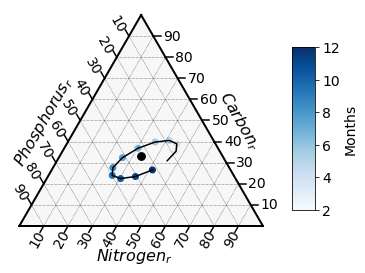

In [9]:
# normalize time series
cnp_ternary = ternary_normalization(
    c_array=carbon,
    n_array=nitrogen,
    p_array=phosphorus,
    ratio=(106, 6, 1)
)

# show in ternary plot
f, ax = plt.subplots(figsize=(6, 6))
tax = ternary_subplot(
    ax,
    fs=FS,
    blbl='$Nitrogen_{r}$',
    rlbl='$Carbon_{r}$',
    llbl='$Phosphorus_{r}$',
    offset=.15,
    b_offset=.1
)
# plot seasonal loop
tax.plot(cnp_ternary, color='k')
# plot points for months
scatter = tax.scatter(
    cnp_ternary,
    c=months,
    cmap='Blues',
    vmin=1,
    vmax=12
)

add_cbar(
    sc=scatter,
    ax=ax,
    cmap='Blues',
    ticks=[0, .2, .4, .6, .8, 1],
    tick_labels=[2, 4, 6, 8, 10, 12],
    fs=FS,
    label='Months'
)
plt.show()

In [11]:
# calculate length of loop
dist_of_sample_loop = dist_metric(cnp_ternary)
print('length of sample loop is')
print(dist_of_sample_loop)


length of sample loop is
65.92526139543149
